## 鸢尾花分类
#### 问题描述 
用knn算法实现一个鸢尾花分类器

#### 数据集：
包含150个数据：  
3种类别(Setosa:山鸢尾，Versicolour:杂色鸢尾，Virginica:维吉尼亚鸢尾)，每类50个数据  
4个特征属性：花瓣长度、花瓣宽度、花萼长度、花萼宽度  
标签：3种花的类别 0、1、2

In [26]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

导入iris数据集并可视化显示

(150, 4)


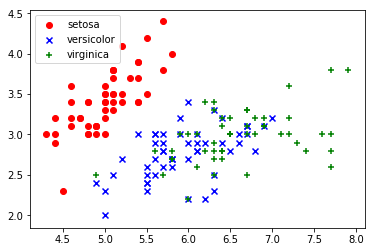

In [28]:
iris = load_iris()
print (iris.data.shape)
X = [x[0] for x in iris.data]
Y = [x[1] for x in iris.data]

plt.scatter(X[:50], Y[:50],color='red',marker='o',label='setosa')
plt.scatter(X[50:100], Y[50:100],color='blue',marker='x',label='versicolor')
plt.scatter(X[100:], Y[100:],color='green',marker='+',label='virginica')
#plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
plt.legend(loc=2)
plt.show()
#print(iris.DESCR)

对数据集进行分割，按3:1的比例随机分为训练集和测试集  
注意：划分时test_size和random_state的值不一样，最后的训练结果就不一样

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state = 33 )

数据标准化处理

In [23]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

调用K近邻算法进行训练和预测

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [25]:
print('The Accuracy of K-Nearest Neighbor Classifier is: ',knn.score(X_test, y_test))
print(classification_report(y_test,y_predict,target_names=iris.target_names))

The Accuracy of K-Nearest Neighbor Classifier is:  0.8947368421052632
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.73      1.00      0.85        11
  virginica       1.00      0.79      0.88        19

avg / total       0.92      0.89      0.90        38

